In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  #n_vars = 1 if type(data) is list else data.shape[1]
  df = DataFrame(data)
  cols, names = list(), list()
# input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var(t-%d)' % (i))] #for j in range(n_vars)]
# forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var(t)')] #for j in range(n_vars)]
    else:
      names += [('var(t+%d)' % (i))] #for j in range(n_vars)]
# put it all together
  agg = concat(cols, axis=1)
  agg.columns = names
# drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
  return agg

In [ ]:
df = pd.read_excel('/content/res_data.xlsx', sheet_name='Sheet1')

In [ ]:
df

,Date,Outflow,Level,Inflow,Rainfall,"Outflow,m3","Inflow,m3"
0,2000-01-01,37.731481,127.41,29.513889,0.00,3260000,2550000
1,2000-01-02,23.611111,127.41,23.611111,0.00,2040000,2040000
2,2000-01-03,40.162037,127.39,23.726852,0.00,3470000,2050000
3,2000-01-04,14.930556,127.40,23.148148,0.00,1290000,2000000
4,2000-01-05,24.074074,127.39,15.856481,0.00,2080000,1370000
...,...,...,...,...,...,...,...
7300,2019-12-27,28.703704,128.85,19.791667,3.61,2480000,1710000
7301,2019-12-28,28.472222,128.83,10.648148,0.00,2460000,920000
7302,2019-12-29,28.703704,128.81,10.879630,0.00,2480000,940000
7303,2019-12-30,42.939815,128.77,7.523148,0.00,3710000,650000


In [ ]:
cols = list(df)[1:5]
data = df[cols].astype(float)

In [ ]:
data

,Outflow,Level,Inflow,Rainfall
0,37.731481,127.41,29.513889,0.00
1,23.611111,127.41,23.611111,0.00
2,40.162037,127.39,23.726852,0.00
3,14.930556,127.40,23.148148,0.00
4,24.074074,127.39,15.856481,0.00
...,...,...,...,...
7300,28.703704,128.85,19.791667,3.61
7301,28.472222,128.83,10.648148,0.00
7302,28.703704,128.81,10.879630,0.00
7303,42.939815,128.77,7.523148,0.00


In [ ]:
#converting data into array
values = data.values

In [ ]:
values.shape

(7305, 4)

In [ ]:
# ensure all data is float
values = values.astype('float32')

In [ ]:
values

array([[ 37.73148  , 127.41     ,  29.51389  ,   0.       ],
       [ 23.61111  , 127.41     ,  23.61111  ,   0.       ],
       [ 40.162037 , 127.39     ,  23.726852 ,   0.       ],
       ...,
       [ 28.703703 , 128.81     ,  10.87963  ,   0.       ],
       [ 42.939816 , 128.77     ,   7.523148 ,   0.       ],
       [ 42.824074 , 128.73     ,   7.4074073,   0.       ]],
      dtype=float32)

In [ ]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)


In [ ]:
scaled_values

array([[0.00657656, 0.69470406, 0.00482124, 0.        ],
       [0.00411539, 0.69470406, 0.00385699, 0.        ],
       [0.0070002 , 0.69314575, 0.0038759 , 0.        ],
       ...,
       [0.00500303, 0.80373764, 0.00177724, 0.        ],
       [0.00748437, 0.80062294, 0.00122894, 0.        ],
       [0.00746419, 0.7975073 , 0.00121004, 0.        ]], dtype=float32)

In [ ]:
O,L,I,R =scaled_values.T

In [ ]:
Os = series_to_supervised(O,4,1)
Ls = series_to_supervised(L,2,0)
Is= series_to_supervised(I,2,0)
Rs = series_to_supervised(R,1,0)

In [ ]:
dfs=[Os,Ls,Is,Rs]
Input=pd.concat(dfs,axis=1,keys=range(1,len(dfs)+1))
Input.columns = Input.columns.map('{0[1]}{0[0]}'.format)
#Input = Input.iloc[3-0:]
Input = Input.drop(Input.index[-3:])

In [ ]:
Input

,var(t-4)1,var(t-3)1,var(t-2)1,var(t-1)1,var(t)1,var(t-2)2,var(t-1)2,var(t-2)3,var(t-1)3,var(t-1)4
4,0.006577,0.004115,0.007000,0.002602,0.004196,0.693146,0.693925,0.003876,0.003781,0.000000
5,0.004115,0.007000,0.002602,0.004196,0.008473,0.693925,0.693146,0.003781,0.002590,0.000000
6,0.007000,0.002602,0.004196,0.008473,0.007948,0.693146,0.690810,0.002590,0.003933,0.000000
7,0.002602,0.004196,0.008473,0.007948,0.007807,0.690810,0.688474,0.003933,0.003441,0.000000
8,0.004196,0.008473,0.007948,0.007807,0.007767,0.688474,0.686137,0.003441,0.003328,0.000000
...,...,...,...,...,...,...,...,...,...,...
7300,0.002986,0.002986,0.002986,0.005003,0.005003,0.809190,0.807632,0.000000,0.001777,0.024400
7301,0.002986,0.002986,0.005003,0.005003,0.004963,0.807632,0.806854,0.001777,0.003233,0.018902
7302,0.002986,0.005003,0.005003,0.004963,0.005003,0.806854,0.805296,0.003233,0.001739,0.000000
7303,0.005003,0.005003,0.004963,0.005003,0.007484,0.805296,0.803738,0.001739,0.001777,0.000000


In [ ]:
y=Input[Input.columns[Input.columns.isin(['var(t)1'])]]

In [ ]:
X=Input.drop(['var(t)1'],axis=1)

In [ ]:
x_train=X[:4378]
x_val=X[4378:5472]
x_test=X[5472:]
y_train=y[:4378]
y_val=y[4378:5472]
y_test=y[5472:]

In [ ]:
x_train

,var(t-4)1,var(t-3)1,var(t-2)1,var(t-1)1,var(t-2)2,var(t-1)2,var(t-2)3,var(t-1)3,var(t-1)4
4,0.006577,0.004115,0.007000,0.002602,0.693146,0.693925,0.003876,0.003781,0.0
5,0.004115,0.007000,0.002602,0.004196,0.693925,0.693146,0.003781,0.002590,0.0
6,0.007000,0.002602,0.004196,0.008473,0.693146,0.690810,0.002590,0.003933,0.0
7,0.002602,0.004196,0.008473,0.007948,0.690810,0.688474,0.003933,0.003441,0.0
8,0.004196,0.008473,0.007948,0.007807,0.688474,0.686137,0.003441,0.003328,0.0
...,...,...,...,...,...,...,...,...,...
4377,0.000767,0.001937,0.001937,0.000000,0.657321,0.657321,0.001815,0.000000,0.0
4378,0.001937,0.001937,0.000000,0.000000,0.657321,0.658100,0.000000,0.001286,0.0
4379,0.001937,0.000000,0.000000,0.000000,0.658100,0.658100,0.001286,0.000000,0.0
4380,0.000000,0.000000,0.000000,0.000000,0.658100,0.658878,0.000000,0.001286,0.0


In [ ]:
y_train

,var(t)1
4,0.004196
5,0.008473
6,0.007948
7,0.007807
8,0.007767
...,...
4377,0.000000
4378,0.000000
4379,0.000000
4380,0.000000


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4378, 9), (1829, 9), (4378, 1), (1829, 1))

In [ ]:
# {'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
#model architexture
regressor = SVR(kernel= 'rbf', degree=3, gamma='auto', C=10, epsilon=0.001, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, epsilon=0.001, gamma='auto')

In [ ]:
te_yp = regressor.predict(x_test)
val_yp = regressor.predict(x_val)
tr_yp = regressor.predict(x_train)

In [ ]:
tr_yp = tr_yp.reshape(-1, 1)
val_yp = val_yp.reshape(-1, 1)
te_yp = te_yp.reshape(-1, 1)

In [ ]:
te_yp.shape
# x_train[:,:4].shape, tr_yp.shape, x_train.shape

(1829, 1)

In [ ]:
#converting dataframe to array to reshape in next step
x_train=x_train.values
y_train=y_train.values
x_val=x_val.values
y_val=y_val.values
x_test=x_test.values
y_test=y_test.values

In [ ]:
#inverse_transform
# invert scaling for forecast
inv_tr_yp = concatenate((tr_yp, x_train[:,:3]), axis=1)
inv_tr_yp = scaler.inverse_transform(inv_tr_yp)
inv_tr_yp = inv_tr_yp[:,0]

inv_val_yp = concatenate((val_yp, x_val[:,:3]), axis=1)
inv_val_yp = scaler.inverse_transform(inv_val_yp)
inv_val_yp = inv_val_yp[:,0]

inv_te_yp = concatenate((te_yp, x_test[:,:3]), axis=1)
inv_te_yp = scaler.inverse_transform(inv_te_yp)
inv_te_yp = inv_te_yp[:,0]

# invert scaling for actual
train_y = y_train.reshape((len(y_train), 1))
inv_tr_y = concatenate((train_y, x_train[:, :3]), axis=1)
inv_tr_y= scaler.inverse_transform(inv_tr_y)
inv_tr_y = inv_tr_y[:,0]

val_y = y_val.reshape((len(y_val), 1))
inv_val_y = concatenate((val_y, x_val[:, :3]), axis=1)
inv_val_y= scaler.inverse_transform(inv_val_y)
inv_val_y = inv_val_y[:,0]

test_y = y_test.reshape((len(y_test), 1))
inv_te_y = concatenate((test_y, x_test[:,:3]), axis=1)
inv_te_y = scaler.inverse_transform(inv_te_y)
inv_te_y = inv_te_y[:,0]

In [ ]:
inv_tr_yp,inv_tr_y

(array([16.89814418, 24.85825561, 47.41709135, ...,  1.34938139,
         3.56163607,  1.15300731]),
 array([24.074076, 48.61111 , 45.601852, ...,  0.      ,  0.      ,
         0.      ], dtype=float32))

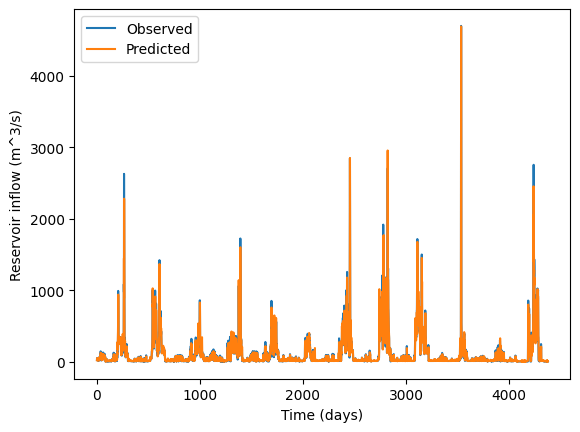

In [ ]:
# pyplot.figure(figsize=(9,4), dpi=400)
pyplot.plot(inv_tr_y, label="Observed")
pyplot.plot(inv_tr_yp, label="Predicted")
pyplot.xlabel("Time (days)")
pyplot.ylabel("Reservoir inflow (m^3/s)")
pyplot.legend()
pyplot.show()

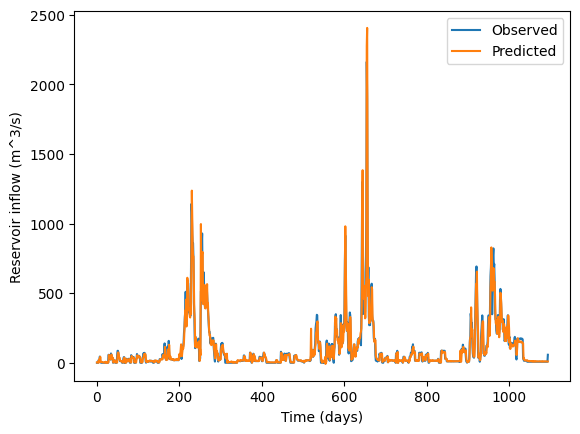

In [ ]:
pyplot.plot(inv_val_y, label="Observed")
pyplot.plot(inv_val_yp, label="Predicted")
pyplot.xlabel("Time (days)")
pyplot.ylabel("Reservoir inflow (m^3/s)")
pyplot.legend()
pyplot.show()

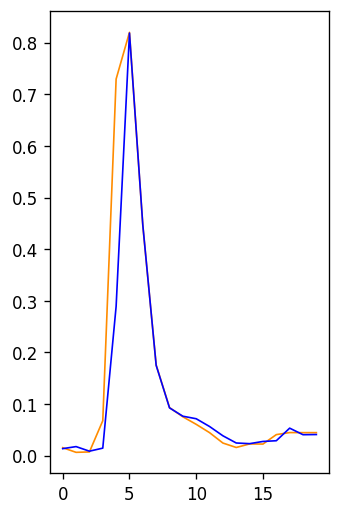

In [ ]:
pyplot.figure(figsize=(3,5), dpi=120)
pyplot.plot(y_train[3530:3550],'darkorange', label="Actual", lw=1)
pyplot.plot(tr_yp[3530:3550], 'b', label="Predicted", lw=1)

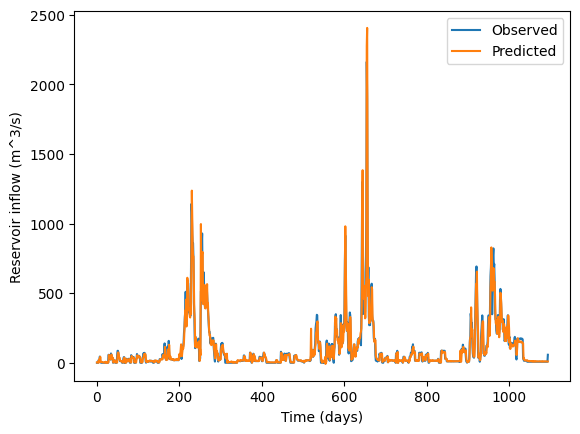

In [ ]:
# pyplot.figure(figsize=(9,4), dpi=400)
pyplot.plot(inv_val_y, label="Observed")
pyplot.plot(inv_val_yp, label="Predicted")
pyplot.xlabel("Time (days)")
pyplot.ylabel("Reservoir inflow (m^3/s)")
pyplot.legend()
pyplot.show()

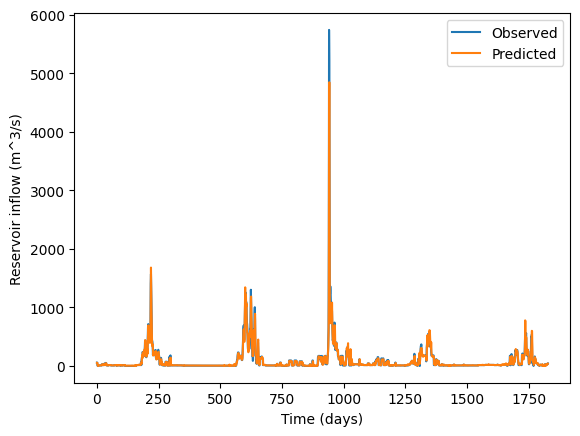

In [ ]:
# pyplot.figure(figsize=(9,4), dpi=200)
pyplot.plot(inv_te_y, label="Observed")
pyplot.plot(inv_te_yp,  label="Predicted")
pyplot.xlabel("Time (days)")
pyplot.ylabel("Reservoir inflow (m^3/s)")
pyplot.legend()
pyplot.show()


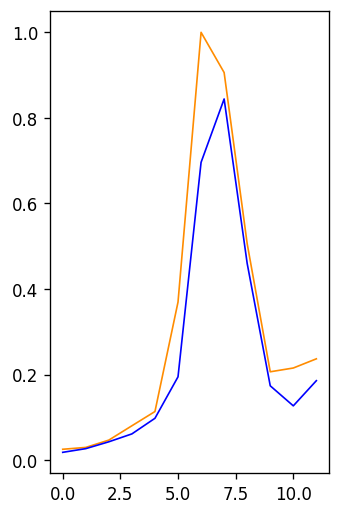

In [ ]:
pyplot.figure(figsize=(3,5), dpi=120)
pyplot.plot(y_test[935:947],'darkorange', label="Actual", lw=1)
pyplot.plot(te_yp[935:947], 'b', label="Predicted", lw=1)

<ipython-input-42-fb7749c5a125>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_lim, y_lim, 'k-', color = 'black', label = '1:1 line')


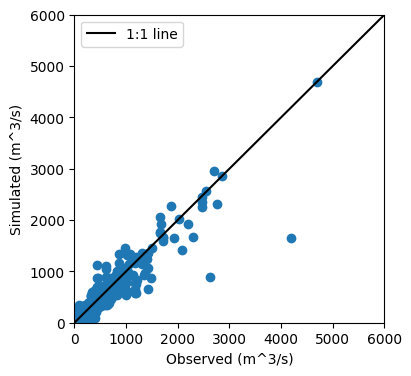

In [ ]:
import matplotlib.pyplot as plt
pyplot.figure(figsize=(4,4), dpi=100)
plt.scatter(inv_tr_y, inv_tr_yp)
y_lim = plt.ylim([0, 6000])
x_lim = plt.ylim([0, 6000])
plt.plot(x_lim, y_lim, 'k-', color = 'black', label = '1:1 line')
plt.ylim(y_lim)
plt.xlim(x_lim)
#plt.title('Training')
plt.xlabel("Observed (m^3/s)")
plt.ylabel("Simulated (m^3/s)")
plt.legend()

<ipython-input-43-192dc4b19c17>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_lim, y_lim, 'k-', color = 'black', label = '1:1 line')


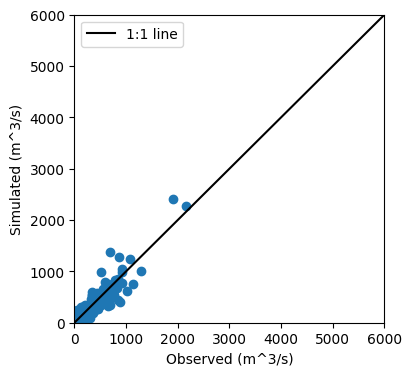

In [ ]:
import matplotlib.pyplot as plt
pyplot.figure(figsize=(4,4), dpi=100)
plt.scatter(inv_val_y, inv_val_yp)
y_lim = plt.ylim([0, 6000])
x_lim = plt.ylim([0, 6000])
plt.plot(x_lim, y_lim, 'k-', color = 'black', label = '1:1 line')
plt.ylim(y_lim)
plt.xlim(x_lim)
#plt.title('Training')
plt.xlabel("Observed (m^3/s)")
plt.ylabel("Simulated (m^3/s)")
plt.legend()

<ipython-input-44-f0b23f7d6b7c>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_lim, y_lim, 'k-', color = 'black', label = '1:1 line')


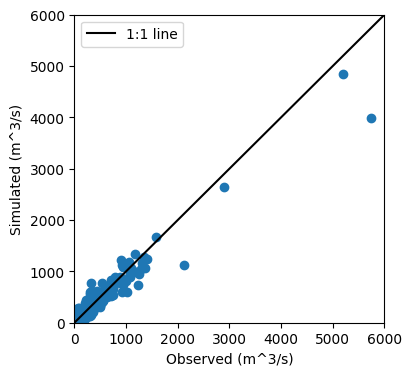

In [ ]:
pyplot.figure(figsize=(4,4), dpi=100)
plt.scatter(inv_te_y, inv_te_yp)
y_lim = plt.ylim([0, 6000])
x_lim = plt.ylim([0, 6000])
plt.plot(x_lim, y_lim, 'k-', color = 'black', label = '1:1 line')
plt.ylim(y_lim)
plt.xlim(x_lim)
#plt.title('Testing')
plt.xlabel("Observed (m^3/s)")
plt.ylabel("Simulated (m^3/s)")
plt.legend()

In [ ]:
!pip install hydroeval
from hydroeval import evaluator, nse
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from math import sqrt

print('MSE =', mse(y_test, te_yp))
print('MAE =', mae(y_test, te_yp))
print('R2 Score =', r2_score(y_test, te_yp))
print('nse_train=', evaluator(nse,tr_yp, y_train))
print('RMSE_train =', sqrt(mse(inv_tr_y,inv_tr_yp)))

print('MSE =', mse(y_val, val_yp))
print('MAE =', mae(y_val, val_yp))
print('R2 Score =', r2_score(y_val, val_yp))
print('nse_val=', evaluator(nse,val_yp, y_val))
print('RMSE_val =', sqrt(mse(inv_val_y,inv_val_yp)))


print('MSE =', mse(tr_yp, y_train))
print('MAE =', mae(tr_yp, y_train))
print('R2 Score =', r2_score(tr_yp, y_train))
print('nse_test=', evaluator(nse,te_yp, y_test))
print('RMSE_test =', sqrt(mse(inv_te_y,inv_te_yp)))



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
MSE = 0.00013584961695415078
MAE = 0.0036989363889952855
R2 Score = 0.9363625281896654
nse_train= [0.91079928]
RMSE_train = 75.98331562212019
MSE = 0.00011733713849497286
MAE = 0.0048226990792501045
R2 Score = 0.8913638675854618
nse_val= [0.89136387]
RMSE_val = 62.14739500402364
MSE = 0.00017539859957369346
MAE = 0.004699682653908966
R2 Score = 0.8975762454821572
nse_test= [0.93636253]
RMSE_test = 66.87047338357586


In [ ]:
# l=np.array([inv_tr_y, inv_tr_yp])
# dataset_train=pd.DataFrame(l)
# dataset_train=dataset_train.transpose()
# dataset_train.columns = ['Predicted', 'Observed']

test_result=np.array([inv_te_yp, inv_te_y])
df_test=pd.DataFrame(test_result)
df_test=df_test.transpose()
df_test.columns = ['y_test_prediction','y_test_Observed']
#df_test.tail(1819)
final_test=df_test.drop(df_test.index[1822:])
final_test

,y_test_prediction,y_test_Observed
0,52.655519,57.175926
1,51.335441,57.175926
2,51.488071,7.291667
3,7.917026,7.291667
4,11.103132,0.000000
...,...,...
1817,27.638535,28.703703
1818,23.303652,0.000000
1819,0.215155,12.152778
1820,16.380900,17.129629


In [ ]:
final_test.to_csv('/content/drive/MyDrive/Colab Notebooks/results/test_SVR_1day.csv')

In [ ]:
# to save as csv file
#final_test.to_excel('testSVM_1DAY.xlsx')
#pd.DataFrame(final_test).to_csv("test_SVR.xlsx")
#pd.DataFrame(inv_tr_yp).to_csv("train_SVR.csv")


OSError: ignored

In [ ]:
#grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'gamma' : ('auto','scale')},
modelsvr = SVR()
grids = GridSearchCV(modelsvr,param,cv=4)

grids.fit(x_train,y_train)


In [ ]:

pred_svm = grids.predict(x_test)
pred_svm_train = grids.predict(x_train)

In [ ]:
grids.best_params_